In [83]:

#iportar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

## part 1

In [84]:
# generar un dataset sintético
X, y = make_regression(n_samples=10000, n_features=1, noise=20, random_state=42)

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [85]:
#fit regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the values using the test set 
y_pred = model.predict(X_test)


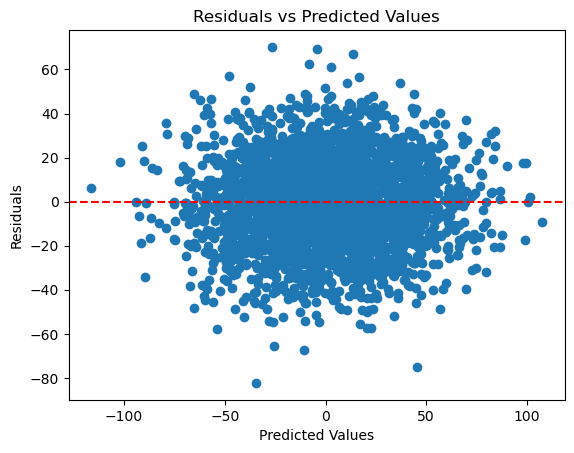

In [86]:
#residuals
residuals = y_test - y_pred

# plot the residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

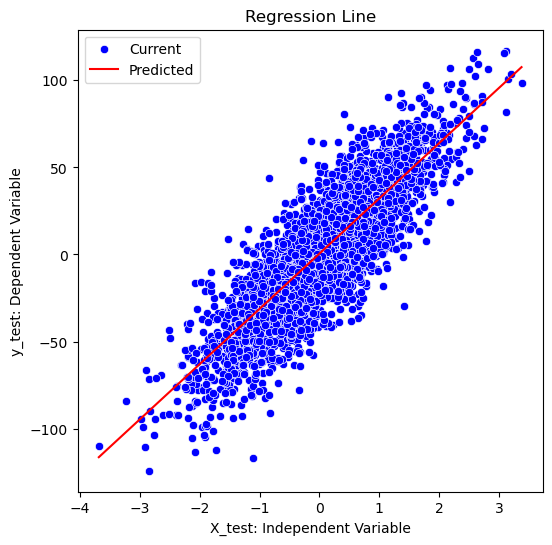

In [87]:
#plotting data and regression 
plt.figure(figsize=(6,6))
sns.scatterplot(x = X_test.flatten(), y = y_test, color='blue', label='Current')
sns.lineplot(x = X_test.flatten(), y = y_pred, color='red', label='Predicted')
plt.xlabel('X_test: Independent Variable')
plt.ylabel('y_test: Dependent Variable')
plt.title('Regression Line')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Homoscedasticity Plot')

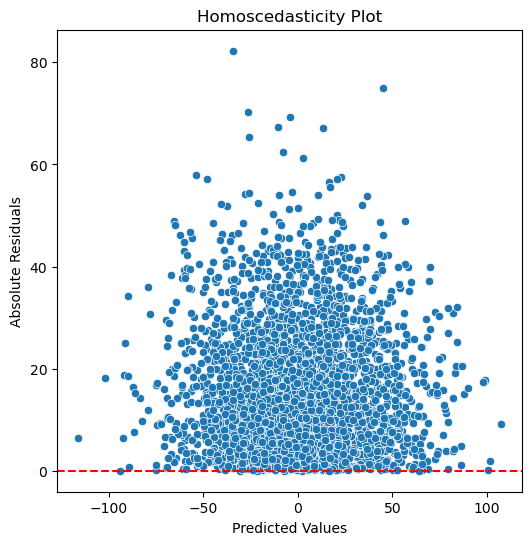

In [88]:
# plot: homoscedasticity
plt.figure(figsize=(6,6))
sns.scatterplot(x = y_pred, y = np.abs(residuals))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Absolute Residuals')
plt.title('Homoscedasticity Plot')

## parte 2

In [89]:
# generate dataset 
np.random.seed(42)
X_example = np.random.rand(200, 1) * 100
y_example = 2 * X_example.squeeze() + np.random.normal(0, X_example.squeeze(), 200)

#split in test and trai
X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(X_example, y_example, test_size=0.3, random_state=42)

# train a model
model_h = LinearRegression()
model_h.fit(X_train_ex, y_train_ex)
y_pred_ex = model_h.predict(X_test_ex)


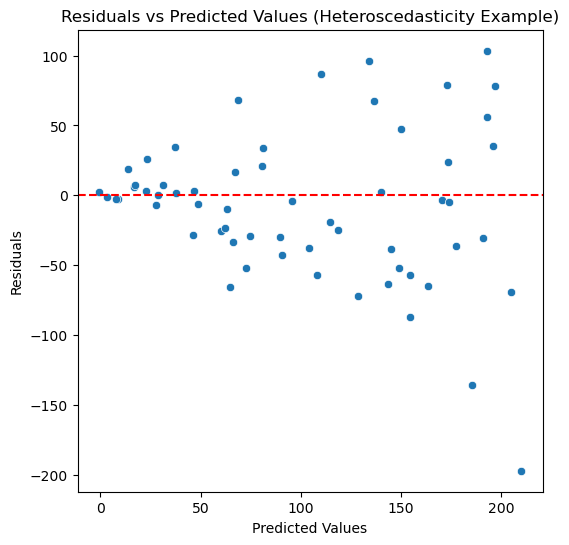

In [90]:
#plot residuals
residuals_ex = y_test_ex - y_pred_ex
plt.figure(figsize=(6,6))
sns.scatterplot(x = y_pred_ex, y = residuals_ex)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Heteroscedasticity Example)')
plt.show()

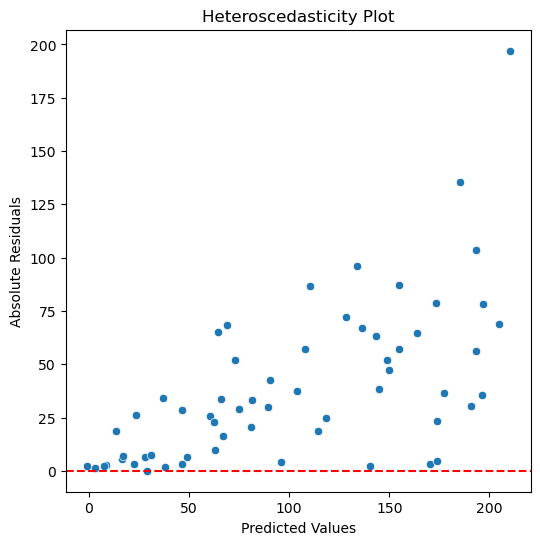

In [91]:
# plot: homoscedasticity
plt.figure(figsize=(6,6))
sns.scatterplot(x = y_pred_ex, y = np.abs(residuals_ex))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Absolute Residuals')
plt.title('Heteroscedasticity Plot')
plt.show()

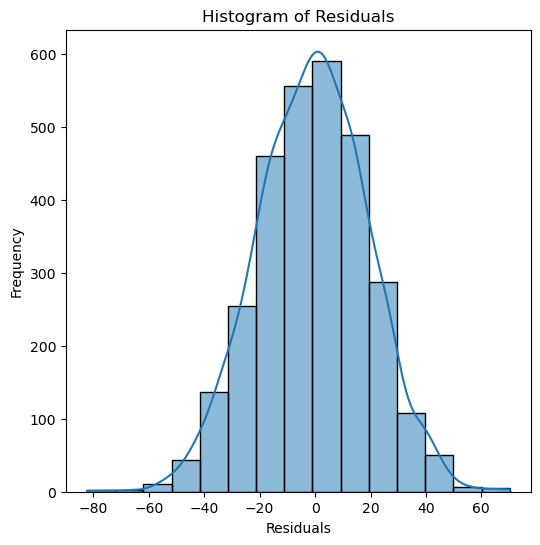

In [92]:
# plot normality of residuals
plt.figure(figsize=(6,6))
sns.histplot(residuals, kde=True,bins=15)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

<Figure size 600x600 with 0 Axes>

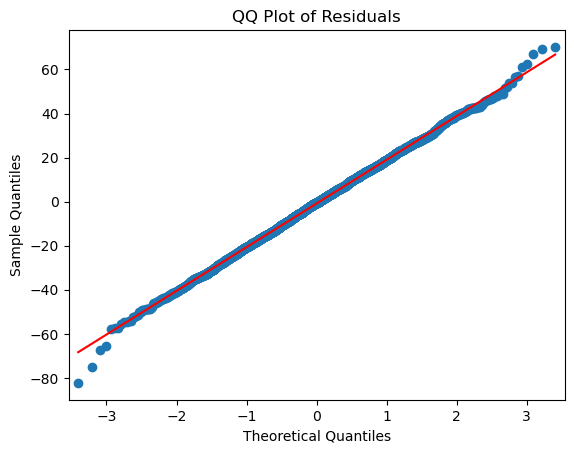

In [93]:
# plot QQ plot  
plt.figure(figsize=(6,6))
sm.qqplot(residuals, line ='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('QQ Plot of Residuals')
plt.show()  

## Dataset wine

Usando variable de alcohol

In [95]:
# dataset wine 
fuente_uci = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data_wine = pd.read_csv(fuente_uci, sep=';')
data_wine.head()

# Usando variable de alcohol
X_wine = data_wine[['alcohol']]
y_wine = data_wine['quality']

# Dividir en conjunto de entrenamiento y prueba
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

# Entrenar un modelo
model_wine = LinearRegression()
model_wine.fit(X_train_wine, y_train_wine)
y_pred_wine = model_wine.predict(X_test_wine)


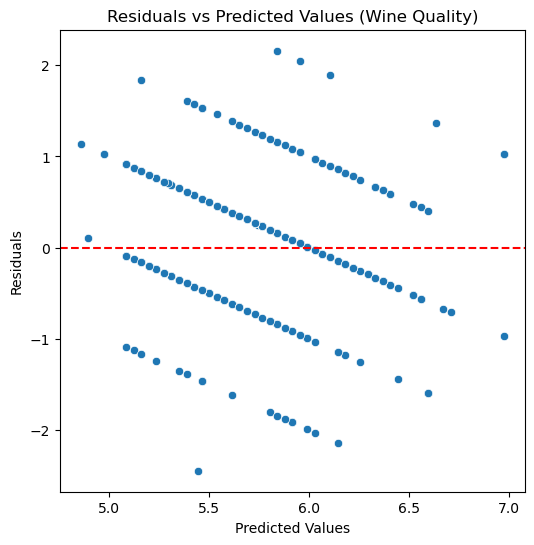

In [96]:
# plot residuals
residuals_wine = y_test_wine - y_pred_wine
plt.figure(figsize=(6,6))
sns.scatterplot(x = y_pred_wine, y = residuals_wine)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')  
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Wine Quality)')
plt.show()  

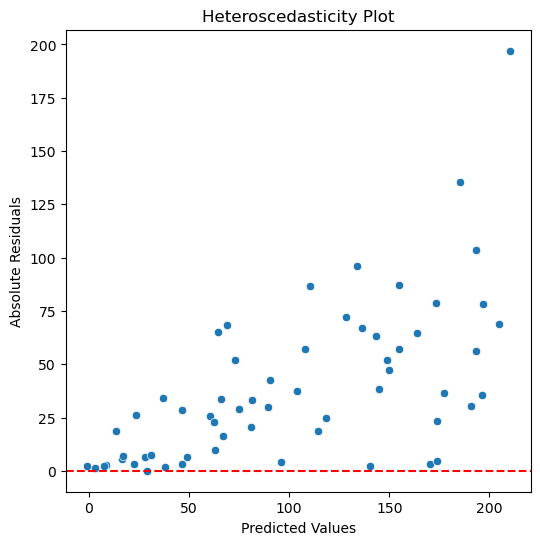

In [97]:
# plot: homoscedasticity
plt.figure(figsize=(6,6))
sns.scatterplot(x = y_pred_ex, y = np.abs(residuals_ex))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Absolute Residuals')
plt.title('Heteroscedasticity Plot')
plt.show()

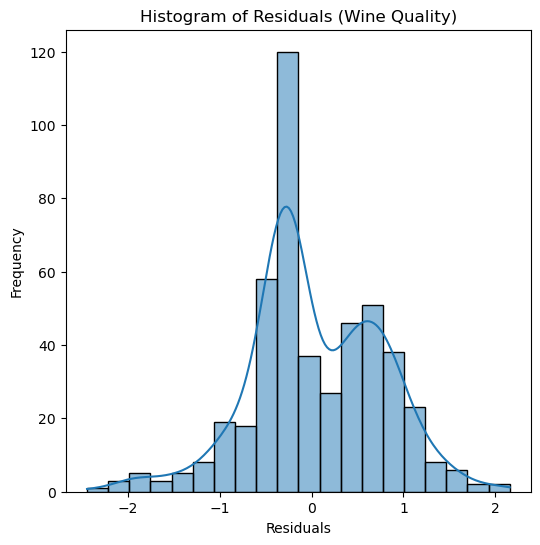

In [103]:
# plot normality of residuals wine
plt.figure(figsize=(6,6))
sns.histplot(residuals_wine, kde=True,bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Wine Quality)')
plt.show()

<Figure size 600x600 with 0 Axes>

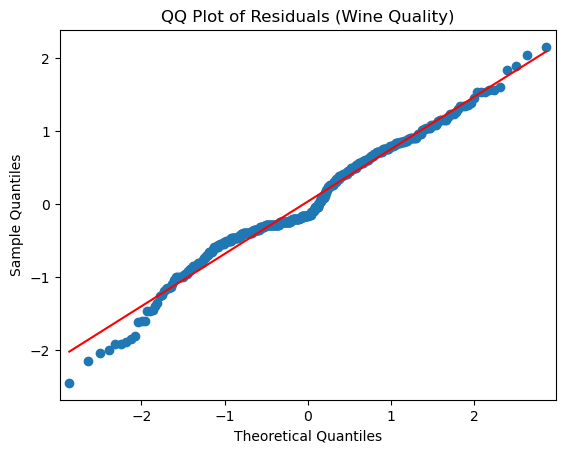

In [104]:
# plot QQ plot  wine 
plt.figure(figsize=(6,6))
sm.qqplot(residuals_wine, line ='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('QQ Plot of Residuals (Wine Quality)')
plt.show()  